In [1]:
from glob import glob
import os 
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd

In [2]:
p_lst = pd.read_csv('/opt/ml/input/data/eval/submission.csv', index_col = 'ImageID')

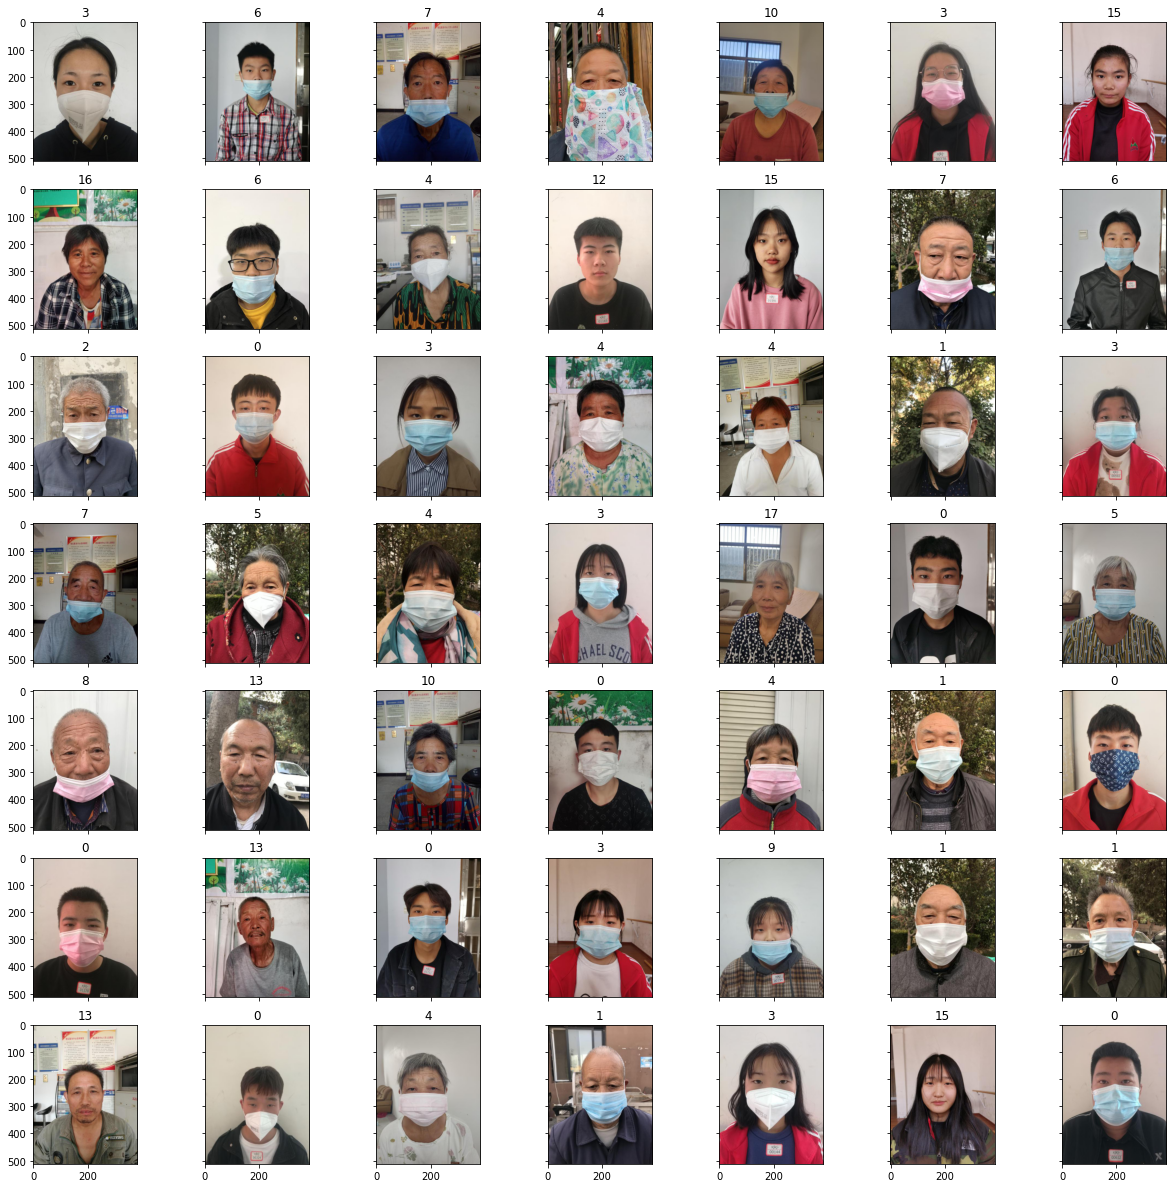

In [3]:
data_dir = f'/opt/ml/input/data/eval/images'
sample = p_lst.sample(49)

fig, axes = plt.subplots(7, 7, sharex=True, sharey=True, figsize=(21, 21))

for i in range(49):
    axes[i%7][i//7].imshow(np.array(Image.open(f'{data_dir}/{sample.index[i]}')))
    axes[i%7][i//7].set_title(sample['ans'][i])

In [12]:
data_dir = f'/opt/ml/input/data/eval/images'
df1 = pd.read_csv('/opt/ml/input/data/eval/submission.csv')
df2 = pd.read_csv('/opt/ml/input/data/eval/submission_NoTTA.csv')
print(df1)

                                            ImageID  ans
0      cbc5c6e168e63498590db46022617123f1fe1268.jpg   13
1      0e72482bf56b3581c081f7da2a6180b8792c7089.jpg    2
2      b549040c49190cedc41327748aeb197c1670f14d.jpg   13
3      4f9cb2a045c6d5b9e50ad3459ea7b791eb6e18bc.jpg   13
4      248428d9a4a5b6229a7081c32851b90cb8d38d0c.jpg   12
...                                             ...  ...
12595  d71d4570505d6af8f777690e63edfa8d85ea4476.jpg    1
12596  6cf1300e8e218716728d5820c0bab553306c2cfd.jpg    4
12597  8140edbba31c3a824e817e6d5fb95343199e2387.jpg    9
12598  030d439efe6fb5a7bafda45a393fc19f2bf57f54.jpg    1
12599  f1e0b9594ae9f72571f0a9dc67406ad41f2edab0.jpg    7

[12600 rows x 2 columns]


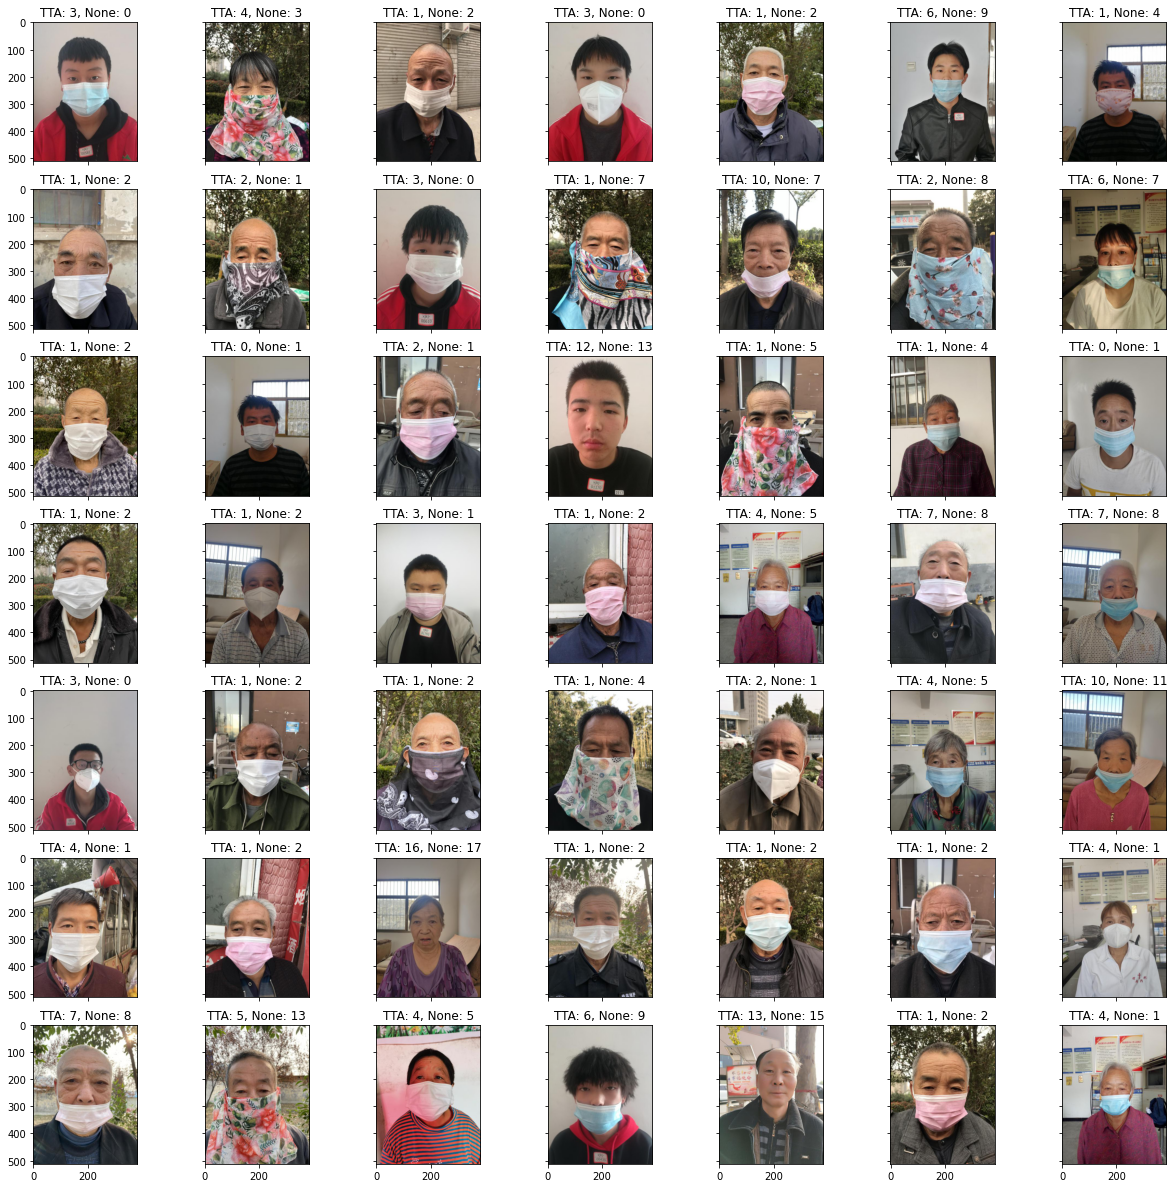

In [22]:
error_list = []
for i in range(len(df1)):
    if df1.iloc[i, -1] != df2.iloc[i, -1]:
        error_list.append([df1.iloc[i, 0], df1.iloc[i, -1], df2.iloc[i, -1]])

df3 = pd.DataFrame(error_list, columns=['path','TTA','NoTTA'])

data_dir = f'/opt/ml/input/data/eval/images'
sample = df3.sample(49)

fig, axes = plt.subplots(7, 7, sharex=True, sharey=True, figsize=(21, 21))

for i in range(49):
    axes[i%7][i//7].imshow(np.array(Image.open(f'{data_dir}/{sample.iloc[i, 0]}')))
    axes[i%7][i//7].set_title(f'TTA: {sample.iloc[i, 1]}, None: {sample.iloc[i, 2]}')